### Study of Economic Growth in Tennessee 2000-2021

This notebook studies the data generated from the [us_county_income_clean](us_county_income_clean.ipynb) notebook. The data is from the [US Census Bureau](https://www2.census.gov/geo/tiger/) and is a study of the per capita income (PCI) per county from 1969 to 2021. In this notebook, We will only focous on the the year of 2000 to 2021 and the state of Tennessee.

In [1]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import pysal
import numpy as np
import mapclassify
import matplotlib.pyplot as plt
import os
from PIL import Image
import IPython.display as display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# get clean the data
per_cap_income = gpd.read_file('uscountypcincome.gpkg')
per_cap_income.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Unnamed: 0', 'GeoFIPS', 'GeoName',
       'Region', 'TableName', 'LineCode', 'IndustryClassification',
       'Description', 'Unit', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'GEOID', 'geometry'],
      dtype='object')

In [3]:
# get data shape
per_cap_income.shape

(3090, 80)

In [4]:
per_cap_income.head()

,STATEFP,COUNTYFP,COUNTYNS,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,...,2014,2015,2016,2017,2018,2019,2020,2021,GEOID,geometry
0,01,027,00161539,Clay,Clay County,06,H1,G4020,None,None,...,28629,29998,29778,30213,31060,32059,34660,38705,01027,"POLYGON ((-85.65365 33.10663, -86.00917 33.090..."
1,01,091,00161572,Marengo,Marengo County,06,H1,G4020,None,None,...,34269,35263,35706,36174,38278,39394,43596,47008,01091,"POLYGON ((-88.07349 31.99018, -87.93066 32.310..."
2,01,049,00161550,DeKalb,DeKalb County,06,H1,G4020,497,22840,...,28977,30675,29973,31098,32174,33015,34999,40026,01049,"POLYGON ((-85.84362 34.20001, -86.10609 34.200..."
3,01,019,00161535,Cherokee,Cherokee County,06,H1,G4020,None,None,...,32688,34898,34711,35613,37085,37751,39416,43719,01019,"POLYGON ((-85.51361 34.52383, -85.46221 34.286..."
4,01,065,00161558,Hale,Hale County,06,H1,G4020,None,46220,...,31778,33843,34491,34904,35303,37619,40633,44085,01065,"POLYGON ((-87.42120 32.87451, -87.52448 32.482..."


In [5]:
# convert the income data to numeric
years = [str(year) for year in range(1969, 2022)]
for year in years:
    per_cap_income[year] = pd.to_numeric(per_cap_income[year], errors='coerce')


# focus on the data from TN
# Filter the data for Tennessee (TN) using the FIPS code 47
tn_per_cap_income = per_cap_income[per_cap_income['STATEFP'] == '47']

# Displaying the first few rows of the Tennessee dataset
tn_per_cap_income.head()

,STATEFP,COUNTYFP,COUNTYNS,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,...,2014,2015,2016,2017,2018,2019,2020,2021,GEOID,geometry
2427,47,065,01639749,Hamilton,Hamilton County,06,H1,G4020,174,16860,...,45396.0,47647.0,48383.0,50148.0,52181.0,54475.0,56545,60089,47065,"POLYGON ((-85.26506 34.98508, -85.36392 34.983..."
2428,47,115,01639770,Marion,Marion County,06,H1,G4020,174,16860,...,33692.0,35314.0,36890.0,38074.0,38934.0,40301.0,43088,46559,47115,"POLYGON ((-85.87302 35.22336, -85.55855 35.319..."
2429,47,185,01639800,White,White County,06,H1,G4020,None,None,...,29792.0,30971.0,31330.0,32040.0,32982.0,35019.0,37603,40770,47185,"POLYGON ((-85.26421 35.97915, -85.26936 35.793..."
2430,47,129,01639778,Morgan,Morgan County,06,H1,G4020,315,28940,...,26266.0,27771.0,27983.0,28854.0,30139.0,32561.0,35188,39005,47129,"POLYGON ((-84.44103 36.16348, -84.34181 36.048..."
2431,47,013,01639728,Campbell,Campbell County,06,H1,G4020,315,28940,...,29958.0,31335.0,31642.0,32398.0,33710.0,35824.0,38706,42471,47013,"POLYGON ((-84.37273 36.21678, -84.26134 36.591..."


#### TN Top Income by Conuty
Lets get the top 5 per capital income per county in the past 20 year


In [6]:
# Selecting the past 10 years
years_2000_2021 = [str(year) for year in range(2000, 2022)]

# Getting the top 10 per capita income counties for each year
top_counties = {}
for year in years_2000_2021:
    top_counties[year] = tn_per_cap_income[['NAME', year]].sort_values(by=year, ascending=False).head(5)

top_counties

{'2000':             NAME     2000
 2478  Williamson  42155.0
 2495    Davidson  35879.0
 2492      Shelby  31720.0
 2427    Hamilton  30940.0
 2489      Wilson  30866.0,
 '2001':             NAME     2001
 2478  Williamson  44642.0
 2495    Davidson  36523.0
 2492      Shelby  33580.0
 2427    Hamilton  30676.0
 2489      Wilson  29509.0,
 '2002':             NAME     2002
 2478  Williamson  44278.0
 2495    Davidson  37615.0
 2492      Shelby  34187.0
 2427    Hamilton  31040.0
 2480        Knox  29858.0,
 '2003':             NAME     2003
 2478  Williamson  45665.0
 2495    Davidson  38821.0
 2492      Shelby  34989.0
 2427    Hamilton  32421.0
 2480        Knox  30764.0,
 '2004':             NAME     2004
 2478  Williamson  50641.0
 2495    Davidson  39105.0
 2492      Shelby  36082.0
 2427    Hamilton  33718.0
 2480        Knox  32331.0,
 '2005':             NAME     2005
 2478  Williamson  54491.0
 2495    Davidson  39701.0
 2492      Shelby  36933.0
 2427    Hamilton  34916.0
 2

Throughout the past decade, Williamson and Davidson consistently rank at the top for per capita income. A few counties, like Hamilton, Knox, and Shelby, also appear frequently in the top 5 list across the years.

#### TN Income Evolution
Now lets take a look at the map, we will plot the per capita income for each county in Tennessee, and see the trend across the past few decades.

In [7]:
# Determine the global min and max per capita income values across the years
global_min = tn_per_cap_income[years_2000_2021].min().min()
global_max = tn_per_cap_income[years_2000_2021].max().max()
global_min, global_max

(13416.0, 107698.0)

In [8]:
# set path to store the images
curr_path = os.getcwd()
image_path = os.path.join(curr_path, 'images')
if not os.path.exists(image_path):
    os.mkdir(image_path)


In [9]:
# Define a list of distinct colors for the top 5 counties
colors = ['blue', 'green', 'red', 'purple', 'orange']

filepaths_2000_2021 = []

for year in years_2000_2021:
    # Get top 5 counties for the current year
    top5_counties = tn_per_cap_income[['NAME', year]].sort_values(by=year, ascending=False).head(5)
    
    # Create the combined figure
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot the PCI map for the current year
    tn_per_cap_income.plot(column=year, ax=ax1, cmap='viridis', vmin=global_min, vmax=global_max)
    ax1.set_title(f"Per Capita Income by County in Tennessee ({year})")
    ax1.set_axis_off()
    
    # Adding a colorbar with the fixed scale
    cax = fig.add_axes([0.9, 0.45, 0.03, 0.3])
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=global_min, vmax=global_max))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label(f'Per Capita Income ({year})')
    
    # Plot the evolution of the top 5 counties' PCI with specified colors
    for idx, county in enumerate(top5_counties['NAME']):
        ax2.plot(years_2000_2021[:years_2000_2021.index(year) + 1], 
                 tn_per_cap_income[tn_per_cap_income['NAME'] == county][years_2000_2021[:years_2000_2021.index(year) + 1]].values[0],
                 label=county, color=colors[idx])
        
    ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax2.set_title(f"Top 5 Counties' Per Capita Income Evolution (2000-{year})")
    ax2.set_ylabel('Per Capita Income')
    ax2.set_xlabel('Year')
    
    # Adjust x-axis labels for better readability
    ax2.set_xticks(np.arange(0, len(years_2000_2021), 2))  # Show every second year for clarity
    ax2.set_xticklabels(years_2000_2021[::2], rotation=45, fontsize=8)  # Rotate labels and adjust font size
    
    # Save each plot to a file
    filepath = os.path.join(image_path, f"plot_{year}.png")
    plt.savefig(filepath, bbox_inches="tight")
    filepaths_2000_2021.append(filepath)
    plt.close()
    


In [10]:
# Compile all the images into a GIF
gif_path_2000_2021 = "tn_income_evolution_2010_2021.gif"
with Image.open(filepaths_2000_2021[0]) as img:
    img.save(gif_path_2000_2021, save_all=True, append_images=[Image.open(f) for f in filepaths_2000_2021[1:]], 
             optimize=False, duration=2000, loop=0)

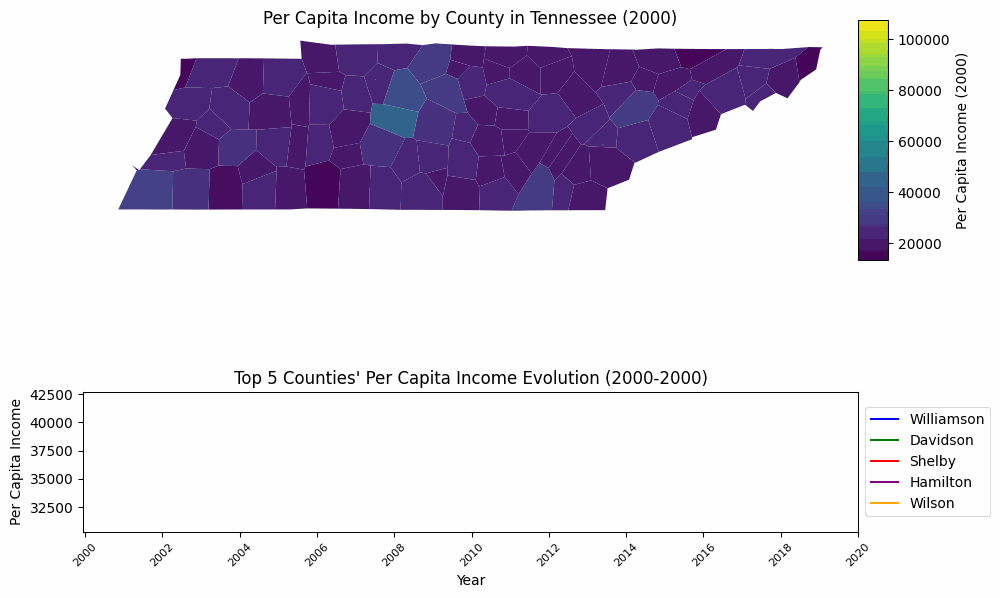

In [11]:
# show the gif
display.Image(filename=gif_path_2000_2021)

#### TN Income vs National Average
Lets now compare the per capita income of the state of Tennessee with the national average in the past 20 year. We will plot the per capita income of the state of Tennessee and the national average for each year.

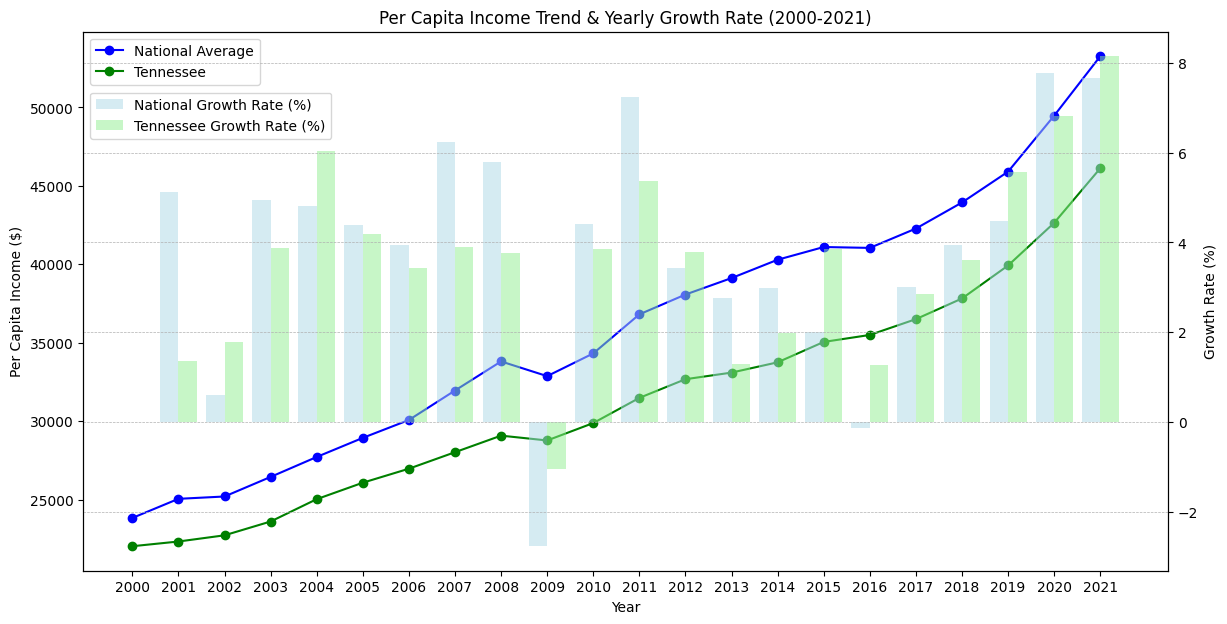

In [12]:
# Extracting per capita income data for Tennessee from 2002 to 2021
tn_income = tn_per_cap_income[years_2000_2021].mean()

# Calculating the national average per capita income for the same period
national_avg_income = per_cap_income[years_2000_2021].mean()

# Calculating the yearly growth rate for Tennessee and the national average
tn_growth_rate = tn_income.pct_change().dropna() * 100  
national_growth_rate = national_avg_income.pct_change().dropna() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))
# Line chart for per capita income
ax1.plot(national_avg_income, label='National Average', color='blue', marker='o')
ax1.plot(tn_income, label='Tennessee', color='green', marker='o')
ax1.set_title('Per Capita Income Trend & Yearly Growth Rate (2000-2021)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Per Capita Income ($)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Bar chart for growth rate on the same x-axis
ax2 = ax1.twinx()
ax2.bar(national_growth_rate.index, national_growth_rate, width=-0.4, align='edge', alpha=0.5, label='National Growth Rate (%)', color='lightblue')
ax2.bar(tn_growth_rate.index, tn_growth_rate, width=0.4, align='edge', alpha=0.5, label='Tennessee Growth Rate (%)', color='lightgreen')
ax2.set_ylabel('Growth Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Key takeways:
- 2008 Drop: The Great Recession, which started in 2007 due to a severe financial crisis and housing market crash, significantly impacted the U.S. economy, with certain states like Tennessee feeling more pronounced effects due to their industrial makeup.
- 2015 Drop: Global economic challenges, including turbulence in the Chinese stock market, introduced volatility to the U.S. economy. Tennessee's specific drop might be tied to regional factors or industry-specific challenges that year.
- Consistent Lag Behind National Average: Tennessee's growth rate might be influenced by its economic diversification, population dynamics, and state-specific policies. A heavy reliance on specific industries or lack of economic diversification could lead to slower growth compared to the national average.
- High Growth from 2018 to 2021: Tennessee experienced an economic rebound post-recession, possibly driven by increased investments in key industries, such as (Automotive Manufacturing, Healthcare, Technology) , and population growth, leading to enhanced demand for services and goods during this period.

#### Inequality study of TN and US
20:20 ratio is a measure of income inequality. Here we take a look at the top 20 reagions with the highest per capita income and the bottom 20 regions with the lowest per capita income. We will then calculate the ratio of the highest per capita income to the lowest per capita income. We will compare the ratio of the state of Tennessee with the entire nation.

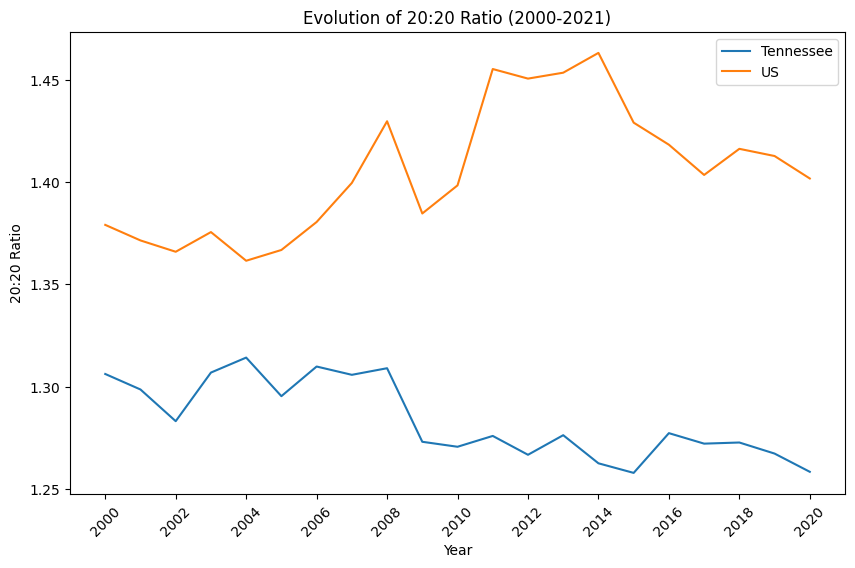

In [13]:
def ineq_20_20(values):
    top20, bottom20 = values.quantile([0.8, 0.2])
    return top20 / bottom20

# Generate range of strings from 1969 to 2018
years = np.arange(2000, 2021).astype(str)

# Compute 20:20 ratio for every year
tn_ratio_2020 = tn_per_cap_income[years].apply(ineq_20_20, axis=0)
us_ratio_2020 = per_cap_income[years].apply(ineq_20_20, axis=0)

# Plot evolution of 20:20 ratio
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, tn_ratio_2020, label='Tennessee')
ax.plot(years, us_ratio_2020, label='US')

# Set title
ax.set_title('Evolution of 20:20 Ratio (2000-2021)')

# Set axis labels
ax.set_xlabel('Year')
ax.set_ylabel('20:20 Ratio')

# Set tick labels
ax.set_xticks(years[::2])
ax.set_xticklabels(years[::2], rotation=45)

# Set legend
ax.legend()

plt.show()

As we can see, the ratio of the state of Tennessee is consistently lower than the national average. This means that the state of Tennessee has a lower income inequality than the national average.